In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('Credit Card Default II (balance).csv')

In [7]:
df

,income,age,loan,default
0,66155.925100,59.017015,8106.532131,0
1,34415.153970,48.117153,6564.745018,0
2,57317.170060,63.108049,8020.953296,0
3,42709.534200,45.751972,6103.642260,0
4,66952.688850,18.584336,8770.099235,1
...,...,...,...,...
3423,60903.191726,21.933924,10367.081892,1
3424,62235.644695,25.033016,8083.900063,1
3425,25597.850590,26.350344,3810.110335,1
3426,48164.194974,23.141976,6529.652892,1


In [8]:
df.describe()
#all x variables are continuous variables 

,income,age,loan,default
count,3428.000000,3428.000000,3428.000000,3428.000000
mean,45136.875975,34.795950,5591.986695,0.500000
std,14425.486619,12.840055,3174.522430,0.500073
min,20014.489470,-52.423280,1.377630,0.000000
25%,32827.211177,25.171939,3103.357467,0.000000
50%,45546.632873,30.086842,5540.305046,0.500000
75%,57514.794130,44.369461,7809.377943,1.000000
max,69995.685580,63.971796,13766.051240,1.000000


In [9]:
df.isnull().sum()
# no null values 

income     0
age        0
loan       0
default    0
dtype: int64

In [10]:
df.isna().sum()
# no NA values

income     0
age        0
loan       0
default    0
dtype: int64

In [11]:
df.duplicated().sum()
#no duplicates

0

In [12]:
print(df[df.default==0].shape[0])
#no umbalanced data observed

1714


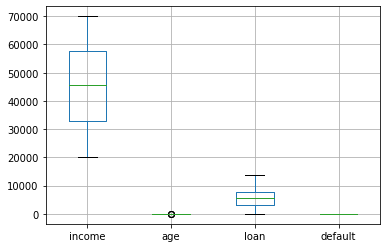

In [13]:
df.boxplot()
#no outliers observed 

In [14]:
print(sum(df['income']<0))
print(sum(df['age']<0))
print(sum(df['loan']<0))
print(sum(df['default']<0))

0
3
0
0


In [15]:
df = df.drop(df[df.age < 0].index)
#remove age less than 0 values as we assume them to be illogical data

In [16]:
df

,income,age,loan,default
0,66155.925100,59.017015,8106.532131,0
1,34415.153970,48.117153,6564.745018,0
2,57317.170060,63.108049,8020.953296,0
3,42709.534200,45.751972,6103.642260,0
4,66952.688850,18.584336,8770.099235,1
...,...,...,...,...
3423,60903.191726,21.933924,10367.081892,1
3424,62235.644695,25.033016,8083.900063,1
3425,25597.850590,26.350344,3810.110335,1
3426,48164.194974,23.141976,6529.652892,1


In [17]:
import matplotlib.pyplot as plt

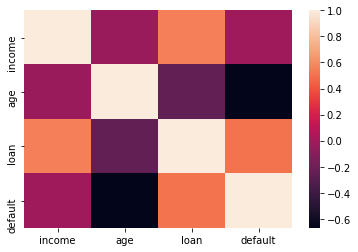

In [18]:
import seaborn as sns
sns.heatmap(df.corr())


# train test split

In [19]:
import random
random.seed(100)

In [20]:
y = df.loc[:, ["default"]]

In [21]:
x = df.iloc[:, 0:3]

In [22]:
#Normalisation
from scipy import stats
x["income"]=stats.zscore(x["income"].astype(np.float))
x["age"]=stats.zscore(x["age"].astype(np.float))
x["loan"]=stats.zscore(x["loan"].astype(np.float))
print(x)


        income       age      loan
0     1.457403  1.909165  0.792201
1    -0.743092  1.047710  0.306524
2     0.844638  2.232494  0.765243
3    -0.168066  0.860782  0.161272
4     1.512641 -1.286373  1.001231
...        ...       ...       ...
3423  1.093247 -1.021644  1.504295
3424  1.185622 -0.776711  0.785072
3425 -1.354369 -0.672598 -0.561212
3426  0.210089 -0.926167  0.295469
3427 -0.837331 -0.677398 -0.075549

[3425 rows x 3 columns]


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)
print(X_train, X_test, Y_train, Y_test)

        income       age      loan
1927 -0.061875 -1.175868  0.989601
2757 -0.036166 -0.372026  0.142510
614  -0.817702  0.927687 -0.838502
2846  0.873758 -1.017167  1.587021
1253 -0.111291  1.978321 -1.048023
...        ...       ...       ...
1108 -0.719183 -0.047446 -1.752334
3055 -0.697586 -0.723544  0.390180
2661  0.938183 -1.050914  1.191765
22   -1.511640  1.084052 -1.691304
273  -1.550606  0.811094 -1.381599

[2397 rows x 3 columns]         income       age      loan
928   0.271836  1.518079 -1.414216
962   0.539806 -1.096169  1.238014
1091  1.206419  0.342488  1.228090
3242  1.475690 -1.039990  1.915484
3018  1.202902 -0.775356  0.812765
...        ...       ...       ...
1847 -0.603328  0.916170  0.375390
653   0.573130  1.835243  1.520396
449   1.283941 -0.580522  1.031607
2897 -1.138652 -0.696998 -0.443483
2531  0.750152 -1.020860  0.707071

[1028 rows x 3 columns]       default
1927        1
2757        1
614         0
2846        1
1253        0
...       ...
1108        

# linear regression

In [31]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [104]:
model = linear_model.LogisticRegression()

In [105]:
model.fit(X_train,Y_train)

C:\Users\Wu Yongyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
pred = model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [108]:
cm = confusion_matrix(Y_test, pred)

In [109]:
print((cm[0,0] + cm[1,1])/sum(sum(cm)))
#0.9513618677042801

0.9513618677042801


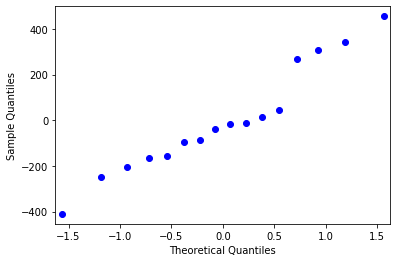

In [110]:
## QQplot
import statsmodels.api as sm
from matplotlib import pyplot as plt
data = sm.datasets.longley.load()
exog = sm.add_constant(data.exog)
mod_fit = sm.OLS(data.endog, exog).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res)
plt.show()


In [111]:
import statsmodels.api as sm
model=sm.Logit(y,x)
result=model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.189963
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.726    
Dependent Variable: default          AIC:              1307.2456
Date:               2022-02-25 20:16 BIC:              1325.6622
No. Observations:   3425             Log-Likelihood:   -650.62  
Df Model:           2                LL-Null:          -2374.0  
Df Residuals:       3422             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
income      -2.1915    0.1135  -19.3078  0.0000  -2.4140  -1.9691
age         -3.0841    0.1203  -25.6413  0.0000  -3.3198  -2.8483
loan    

# Decision Tree

In [30]:
from sklearn import tree

In [113]:
modeltree = tree.DecisionTreeClassifier()

In [114]:
modeltree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
predtree = modeltree.predict(X_test)

In [116]:
cm_tree = confusion_matrix(Y_test,predtree)
print(cm_tree)

[[505   2]
 [  4 517]]


In [117]:
print((cm_tree[0,0] + cm_tree[1,1])/sum(sum(cm_tree)))

0.9941634241245136


In [119]:
#finding best params using grid
import math
from sklearn.model_selection import GridSearchCV

model = tree.DecisionTreeClassifier()
grid_maxdepth = GridSearchCV(estimator = model, param_grid = dict(max_depth = [i for i in range(1, 20)]))
grid_results = grid_maxdepth.fit(x, y)
print(grid_results.best_params_)

grid_minsamplesplit = GridSearchCV(estimator = model, param_grid = dict( min_samples_split = [i for i in range(3, 20)]))
grid_results = grid_minsamplesplit.fit(x, y)
print(grid_results.best_params_)



{'max_depth': 10}
{'min_samples_split': 4}


In [145]:
#using max_depth = 10 and min_samples_split = 4
modeltree = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 4)
modeltree.fit(X_train,Y_train)
predtree = modeltree.predict(X_test)
cm_tree = confusion_matrix(Y_test,predtree)
print(cm_tree)
print((cm_tree[0,0] + cm_tree[1,1])/sum(sum(cm_tree)))

#0.9970817120622568

[[505   2]
 [  1 520]]
0.9970817120622568


[Text(822.2045454545455, 516.4200000000001, 'X[1] <= -0.016\ngini = 0.5\nsamples = 2397\nvalue = [1204, 1193]'),
 Text(596.0454545454546, 462.06000000000006, 'X[2] <= -0.98\ngini = 0.339\nsamples = 1519\nvalue = [329, 1190]'),
 Text(562.2272727272727, 407.70000000000005, 'gini = 0.0\nsamples = 165\nvalue = [165, 0]'),
 Text(629.8636363636364, 407.70000000000005, 'X[2] <= 0.019\ngini = 0.213\nsamples = 1354\nvalue = [164, 1190]'),
 Text(397.3636363636364, 353.34000000000003, 'X[0] <= -0.562\ngini = 0.4\nsamples = 482\nvalue = [133, 349]'),
 Text(253.63636363636365, 298.98, 'X[0] <= -0.933\ngini = 0.105\nsamples = 343\nvalue = [19, 324]'),
 Text(169.0909090909091, 244.62, 'X[2] <= -0.793\ngini = 0.041\nsamples = 287\nvalue = [6, 281]'),
 Text(101.45454545454547, 190.26000000000005, 'X[0] <= -1.333\ngini = 0.177\nsamples = 51\nvalue = [5, 46]'),
 Text(67.63636363636364, 135.90000000000003, 'X[1] <= -1.069\ngini = 0.042\nsamples = 47\nvalue = [1, 46]'),
 Text(33.81818181818182, 81.54000000

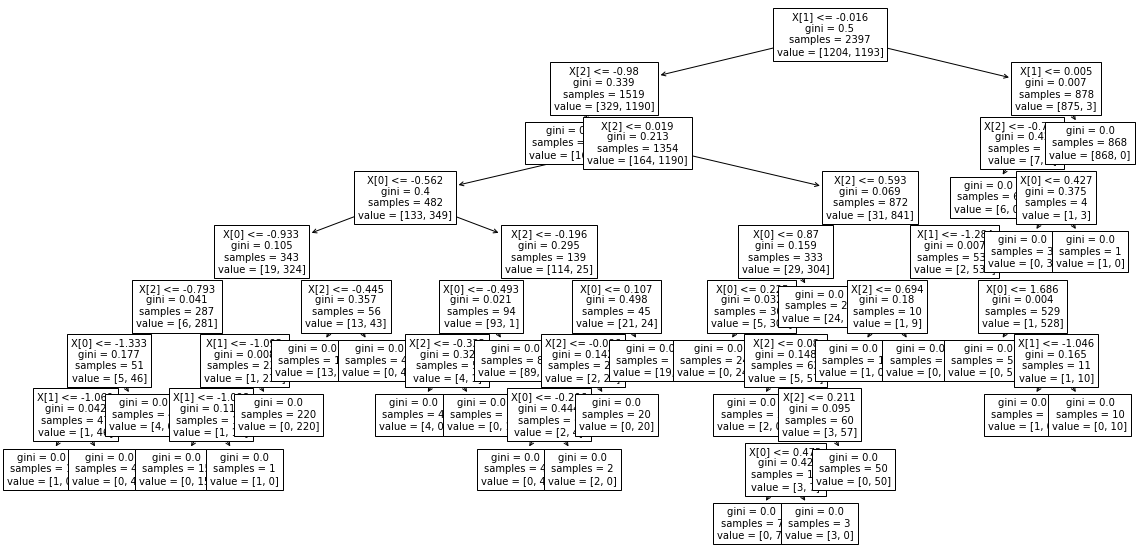

In [146]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(20, 10))
tree.plot_tree(modeltree, fontsize=10)


# Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
modelforest = RandomForestClassifier(max_depth=10, min_samples_split = 4)

In [162]:
modelforest.fit(X_train, Y_train)
pred_rf = modelforest.predict(X_train)

C:\Users\Wu Yongyu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [163]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, pred_rf)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

#accuracy = 0.999165623696287

[[1202    2]
 [   0 1193]]
0.999165623696287


# XG boost

In [164]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth=10, min_samples_split = 4)
model.fit(X_train, Y_train)
pred = model.predict(X_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, pred)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

#accuracy = 0.995136186770428

C:\Users\Wu Yongyu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1204    0]
 [   0 1193]]
1.0
[[505   2]
 [  3 518]]
0.995136186770428


#### The highest accuracy is obtained from the random forest classifier model

# MLP

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(6,2))

In [35]:
model.fit(X_train, Y_train)

C:\Users\Wu Yongyu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [36]:
pred = model.predict(X_test)

In [37]:
cm = confusion_matrix(Y_test,pred)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

#accuracy = 0.867704280155642

[[504   1]
 [  3 520]]
0.9961089494163424


In [38]:
import joblib
joblib.dump(model, "CreditCardDefault")

['CreditCardDefault']